[ref.](https://www.python-graph-gallery.com/web-streamchart-with-matplotlib)

In [1]:
# libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os


In [2]:
%%time

# datasets
title_basics = pd.read_csv("data/title_basics.csv", low_memory=False)
title_ratings = pd.read_csv("data/title_ratings.csv", low_memory=False)
title_principals = pd.read_csv("data/title_principals.csv", low_memory=False)
title_akas = pd.read_csv("data/title_akas.csv", low_memory=False)
title_crew = pd.read_csv("data/title_crew.csv", low_memory=False)
name_basics = pd.read_csv("data/name_basics.csv", low_memory=False)
title_episode = pd.read_csv("data/title_episode.csv", low_memory=False)

CPU times: user 2min 21s, sys: 19.1 s, total: 2min 40s
Wall time: 2min 40s


In [3]:
title_basics.head(3)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,0,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,0,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,0,4,"Animation,Comedy,Romance"


In [4]:
title_ratings.head(3)

,tconst,averageRating,numVotes
0,tt0000001,5.7,1908
1,tt0000002,5.8,256
2,tt0000003,6.5,1708


In [5]:
title_principals.head(3)

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,UNKNOWN,"[""Self""]"
1,tt0000001,2,nm0005690,director,UNKNOWN,UNKNOWN
2,tt0000001,3,nm0374658,cinematographer,director of photography,UNKNOWN


In [6]:
title_akas.head(3)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,UNKNOWN,imdbDisplay,NaN,0
1,tt0000001,2,Carmencita,DE,UNKNOWN,UNKNOWN,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,UNKNOWN,imdbDisplay,NaN,0


In [7]:
title_crew.head(3)

,tconst,directors,writers
0,tt0000001,nm0005690,UNKNOWN
1,tt0000002,nm0721526,UNKNOWN
2,tt0000003,nm0721526,UNKNOWN


In [8]:
title_episode.head(3)

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0020666,tt15180956,1,2
1,tt0020829,tt15180956,1,1
2,tt0021166,tt15180956,1,3


In [9]:
name_basics.head(3)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0072308,tt0050419,tt0053137"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0071877,tt0117057,tt0038355,tt0037382"
2,nm0000003,Brigitte Bardot,1934,0,"actress,soundtrack,music_department","tt0054452,tt0056404,tt0057345,tt0049189"


In [10]:
title_basics.genres = title_basics.genres.replace(r'\N', 'UNKNOWN')

In [11]:
# movies timeline
title_basics.loc[title_basics.startYear>0]['startYear'].agg({'min':'min', 'max':'max'})

min    1874
max    2029
Name: startYear, dtype: int64

In [12]:
# uniq titles
len(title_basics.tconst.unique())

9193618

In [13]:
%%time

# just titles and genres
titles_genres = title_basics.loc[:, ['tconst','primaryTitle','originalTitle','startYear','genres']]

# explode each genre in a row to multiple rows
titles_genres = titles_genres.set_index(['tconst','primaryTitle','originalTitle',
                         'startYear']).apply(lambda x: x.str.split(',').explode()).reset_index()
titles_genres.head(6)

CPU times: user 1min 10s, sys: 5.03 s, total: 1min 15s
Wall time: 1min 15s


,tconst,primaryTitle,originalTitle,startYear,genres
0,tt0000001,Carmencita,Carmencita,1894,Documentary
1,tt0000001,Carmencita,Carmencita,1894,Short
2,tt0000002,Le clown et ses chiens,Le clown et ses chiens,1892,Animation
3,tt0000002,Le clown et ses chiens,Le clown et ses chiens,1892,Short
4,tt0000003,Pauvre Pierrot,Pauvre Pierrot,1892,Animation
5,tt0000003,Pauvre Pierrot,Pauvre Pierrot,1892,Comedy


In [14]:
# no of titles per genre
len(titles_genres.genres.unique())

29

In [15]:
# merge title_genres with ratings
titles = titles_genres.merge(title_ratings, on='tconst', how='left')

In [16]:
df = titles.groupby(['startYear', 'genres']).agg({
    'tconst': 'count', 
    'averageRating': np.mean}).reset_index().rename(columns={'tconst': 'total_titles', 
                                                             'averageRating': 'avg_rating'})
df

,startYear,genres,total_titles,avg_rating
0,0,Action,31754,7.691667
1,0,Adult,1185,8.500000
2,0,Adventure,37004,7.116667
3,0,Animation,72049,7.450000
4,0,Biography,10711,5.450000
...,...,...,...,...
3560,2029,Crime,1,NaN
3561,2029,Drama,2,NaN
3562,2029,Sci-Fi,3,NaN
3563,2029,Thriller,1,NaN


In [17]:
list(df.genres.unique())

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'UNKNOWN',
 'War',
 'Western',
 'Film-Noir']

#### major top 10 genres:
- Action
- Adventure
- Comedy
- Drama
- Horror
- Romance
- Sci-Fi
- Fantasy
- Historical
- Crime

#### major types of films:
- Film Noir
- Documentray
- German expressionism
- Italian neorealism
- Spaghetti western

Source: [Ref.](https://www.indeed.com/career-advice/career-development/types-of-film-styles)


In [18]:
import matplotlib.image as image
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy import stats

In [19]:
# utility to adjust the brightness/lightness of colors
def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], c[1] * amount, c[2])

In [20]:
df_top_genres = df.loc[df.genres.isin(['Action','Adventure','Adult','Comedy','Drama','Horror','Romance',
                                       'Sci-Fi','Fantasy','History','Crime'])]

df_top_genres

,startYear,genres,total_titles,avg_rating
0,0,Action,31754,7.691667
1,0,Adult,1185,8.500000
2,0,Adventure,37004,7.116667
5,0,Comedy,220026,5.811404
6,0,Crime,42868,7.710526
...,...,...,...,...
3558,2029,Action,4,NaN
3559,2029,Adventure,1,NaN
3560,2029,Crime,1,NaN
3561,2029,Drama,2,NaN


In [21]:
# Put the data in long form
df_top_genres = pd.melt(
    df_top_genres,
    id_vars = ["genres", "startYear"],
    value_vars = ["total_titles", "avg_rating"],
    var_name = "parameter",
    value_name = "value"
)

df_top_genres

,genres,startYear,parameter,value
0,Action,0,total_titles,31754.0
1,Adult,0,total_titles,1185.0
2,Adventure,0,total_titles,37004.0
3,Comedy,0,total_titles,220026.0
4,Crime,0,total_titles,42868.0
...,...,...,...,...
2875,Action,2029,avg_rating,NaN
2876,Adventure,2029,avg_rating,NaN
2877,Crime,2029,avg_rating,NaN
2878,Drama,2029,avg_rating,NaN


In [22]:
# It's possible there's more than one count for a combination of "genres", "startYear", and "parameter". 
# This piece of code makes sure there's only one value by computing the mean

df_top_genres = df_top_genres.sort_values(by = ["genres", "startYear"])
# df_top_genres = df_top_genres.groupby(["genres", "startYear", "parameter"]).agg(
#     value = ("value", np.mean)
# ).reset_index()

# df_top_genres

In [23]:
# pre-define the colors and some utilities that are going to be used for the chart. 

PALETTE = [
    adjust_lightness("#595A52", 1.25), "#595A52",
    adjust_lightness("#8E038E", 1.2), "#8E038E",
    adjust_lightness("#13AFEF", 1.25), "#13AFEF",
    adjust_lightness("#C20008", 1.2), "#C20008",
    adjust_lightness("#FFB400", 1.25), "#FFB400"
]

GREY25 = "#404040"
GREY30 = "#4d4d4d"
GREY40 = "#666666"
GREY88 = "#e0e0e0"
GREY95 = "#f2f2f2"

XTICKS = [1875, 1900, 1925, 1950, 1975, 2000, 2025, 2050]

In [24]:
def gaussian_smooth(x, y, grid, sd):
    weights = np.transpose([stats.norm.pdf(grid, m, sd) for m in x])
    weights = weights / weights.sum(0)
    return (weights * y).sum(1)

In [25]:
GENRES = df_top_genres.genres.unique()

df_ratings = df_top_genres.query("parameter == 'avg_rating'").copy()
df_ratings = df_ratings.loc[df_ratings.startYear>0]
df_ratings.value.fillna(0, inplace=True)

years = [
    df_ratings[df_ratings["genres"] == genre]["startYear"].values
    for genre in GENRES
]

ratings = [
    df_ratings[df_ratings["genres"] == genre]["value"].values
    for genre in GENRES
]

minYr = df_top_genres.loc[df_top_genres.startYear>0]['startYear'].min()
maxYr = df_top_genres['startYear'].max()


grid = np.linspace(minYr, maxYr, num=200) #list(range(minYr,maxYr+1))

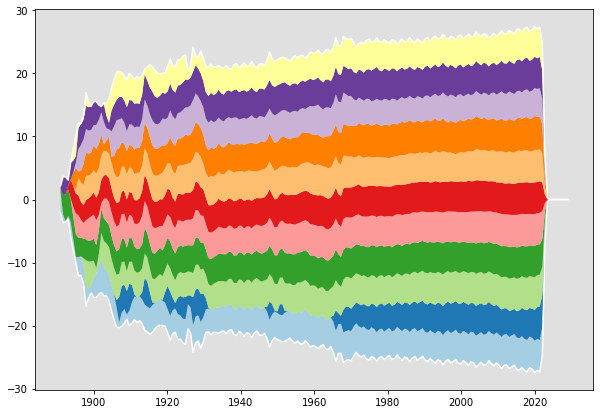

In [26]:
# Basic stacked area chart.
fig, ax = plt.subplots(figsize=(10, 7))

# sd=2 is the standard deviation of the Gaussian function.
values_smoothed = [gaussian_smooth(x, y, grid, sd=0.5) for x, y in zip(years, ratings)]

import seaborn as sns
pal = sns.color_palette("Paired")
ax.stackplot(grid, 
             values_smoothed, 
             colors=pal,#PALETTE, 
             baseline="sym") # baseline="sym" means the chart is symmetric around zero.

# Set background color
ax.set_facecolor(GREY88)

# This 'line' is the sum of values for each issue.
line = np.array(values_smoothed).sum(0)
# Two lines are added, one on top, another on the bottom.
# Both have the same height because of `baseline="sym"`
ax.plot(grid, line / 2, lw=1.5, color="white")
ax.plot(grid, -line / 2, lw=1.5, color="white")
# fig

In [27]:
def streamgraph(df, parameter, ax, grid, sd=2):
    # Keep rows for the given 'parameter'
    df = df[df["parameter"] == parameter]
    
    # Same logic than above
    years = [
        df_ratings[df_ratings["genres"] == genre]["startYear"].values
        for genre in GENRES
    ]

    ratings = [
        df_ratings[df_ratings["genres"] == genre]["value"].values
        for genre in GENRES
    ]
    # Smooth values
    values_smoothed = [gaussian_smooth(x, y, grid, sd) for x, y in zip(years, ratings)]
    
    # Add streamchart
    ax.stackplot(grid, 
                 values_smoothed, 
                 colors=pal,#PALETTE, 
                 baseline="sym")
    
    # Add border lines
    line = np.array(values_smoothed).sum(0)
    ax.plot(grid, line / 2, lw=1.5, color="white")
    ax.plot(grid, -line / 2, lw=1.5, color="white")
    
    # Vertical lines
    for x in XTICKS:
        ax.axvline(x, color=GREY88, ls=(0, (1, 2)), zorder=10)
    
    # Change background color and remove both axis
    ax.set_facecolor(GREY88)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    
    # Also remove all spines
    ax.spines["left"].set_color("none")
    ax.spines["bottom"].set_color("none")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")

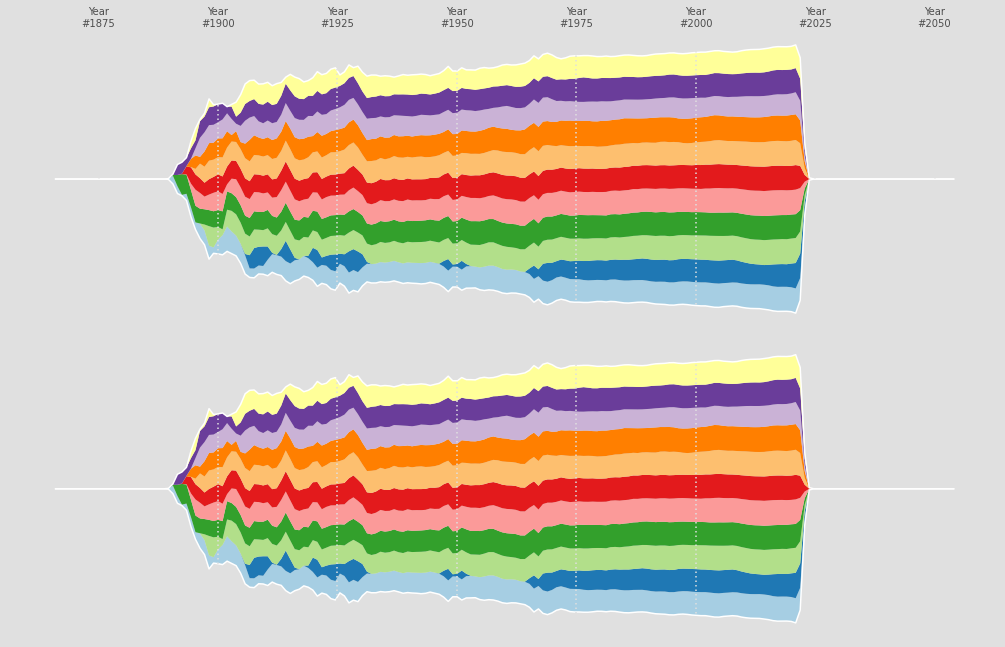

In [28]:
# Some layout stuff ----------------------------------------------
# sharex=True ensures each panel has the same horizontal range
fig, ax = plt.subplots(2, 1, figsize=(14, 10.5), sharex=True)

# Background color for the figure (not each axis)
fig.patch.set_facecolor(GREY88)

# Adjust space between panels
fig.subplots_adjust(left=0.01, bottom=0.1, right=0.99, top=0.9, hspace=0.05)

# Add streamcharts -----------------------------------------------
# This loops along the four axes in the figure.
grid = np.linspace(minYr-25, maxYr+25, num=200)
df_top_genres = df_top_genres.loc[df_top_genres.startYear>0]
for idx, parameter in enumerate(["total_titles","avg_ratings"]):
    streamgraph(df_top_genres, parameter, ax[idx], grid, sd=0.6)


# Add label for horizontal axis ----------------------------------
# Note this is only modifying the labels for `ax[0]`, the top panel.

ax[0].xaxis.set_visible(True)
ax[0].tick_params(axis="x", labeltop=True, length=0)
ax[0].set_xticks(XTICKS)
ax[0].set_xticklabels([f"Year\n#{x}" for x in XTICKS], color=GREY30);

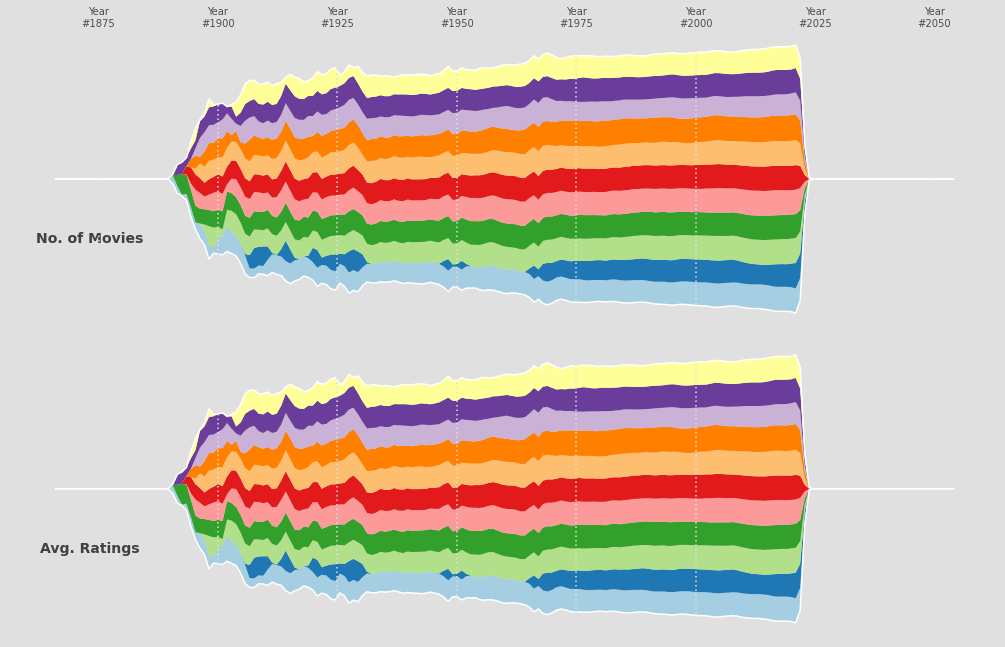

In [29]:
levels = ["total_titles", "avg_ratings"]
labels = pd.DataFrame({
    "years": [78] * 2,
    "value": [-21, -19],
    "parameter": pd.Categorical(levels, levels),
    "label": ["No. of Movies", "Avg. Ratings"]
})

for idx, row in labels.iterrows():
    ax[idx].text(
        0.08, 
        0.3, 
        row["label"], 
        ha="center",
        va="center",
        ma="left",
        color=GREY25,
        size=14,
        weight=900,
        transform=ax[idx].transAxes,

    )
fig

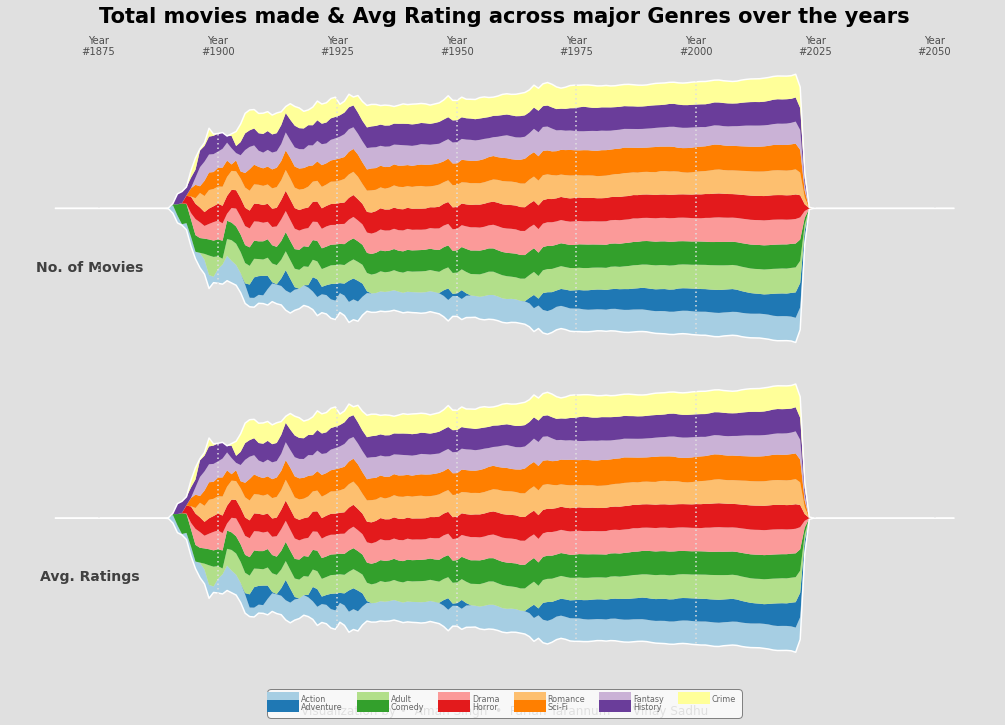

In [30]:
def get_handle(label, color):
    line = Line2D(
        [0], 
        [0], 
        color=color, 
        label=label,
        lw=12
    )
    return line

# Create the labels
labels = ['Action','Adventure','Adult','Comedy','Drama','Horror','Romance','Sci-Fi','Fantasy','History','Crime']

# And create the handles
handles = [get_handle(label, color) for label, color in zip(labels, 
                                                            pal#PALETTE[::-1]
                                                           )]

# Now, add the legend. 
legend = fig.legend(
    handles=handles,
    bbox_to_anchor=[0.5, 0.05], # Located in the mid-bottom of the figure.
    edgecolor=GREY40,
    labelspacing=-0.1,
    loc="center", 
    ncol=6 # The 10 handles are splitted between 5 columns
)

# Change size and color of legend labels
for text in legend.get_texts():
    text.set_fontsize(8)   
    text.set_color(GREY40)

# And finally give a rounded appearence to the frame of the legend
legend.get_frame().set_boxstyle("round", rounding_size=0.4, pad=0.2)

# Add title ------------------------------------------------------
# Note the space in the text. It is where the image will be located.
fig.text(
    0.5,
    0.95,
    "Total movies made & Avg Rating across major Genres over the years",
    fontsize=21,
    fontweight="bold",
    ha="center"
)

# Add caption ----------------------------------------------------
# And finally, the caption that gives credit to the creator of 
# this amazing viz.
fig.text(
    0.5, 
    0.035, 
    "Visualization by •  Aman Singh  •  Fariah Tarannum  •  Vinay Sadhu",
    color=GREY40,
    fontsize=12,
    ha="center"

)

fig